# Preparing the Input & Output to feed the Network

In [1]:
import numpy as n
import pandas as p
import glob
import matplotlib.pyplot as m
import os

In [2]:
# path = os.getcwd()
# print ("The current working directory is %s" % path)

In [3]:
cols_1=n.concatenate([n.arange(428,440)],axis=0)
cols_2=n.arange(1)

In [4]:
data_path="D:\\DATASET\\"
Damaged_Input={}
Undamaged_Input={}
Damaged_Output={}
Undamaged_Output={}

in_list_dam=glob.glob(data_path+"Input\\Damaged\\"+"Joint_*.csv")
in_list_undam=glob.glob(data_path+"Input\\Undamaged\\"+"Joint_*.csv")
out_list_dam=glob.glob(data_path+"Output\\Damaged\\"+"Joint_*.csv")
out_list_undam=glob.glob(data_path+"Output\\Undamaged\\"+"Joint_*.csv")

for list_value in in_list_dam:
    Damaged_Input[int(list_value[list_value.rfind('_')+1:-4])-1]=p.DataFrame(p.read_csv(list_value))
for list_value in in_list_undam:
    Undamaged_Input[int(list_value[list_value.rfind('_')+1:-4])-1]=p.DataFrame(p.read_csv(list_value))

for list_value in out_list_dam:
    Damaged_Output[int(list_value[list_value.rfind('_')+1:-4])-1]=p.DataFrame(p.read_csv(list_value,header=None))
    Damaged_Output[int(list_value[list_value.rfind('_')+1:-4])-1].columns=cols_2
for list_value in out_list_undam:
    Undamaged_Output[int(list_value[list_value.rfind('_')+1:-4])-1]=p.DataFrame(p.read_csv(list_value,header=None))
    Undamaged_Output[int(list_value[list_value.rfind('_')+1:-4])-1].columns=cols_2

In [5]:
X={}

for key in cols_1:
    X[key]=p.DataFrame()
    X[key]=p.concat((Damaged_Input[key],Undamaged_Input[key]),axis=0)
    X[key].reset_index(drop=True,inplace=True)

y={}

for key in cols_1:
    y[key]=p.Series()
    y[key]=p.concat((Damaged_Output[key],Undamaged_Output[key]),axis=0)
    y[key].reset_index(drop=True,inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train={}
y_train={}
X_test={}
y_test={}

for key in cols_1:
    X_train[key],X_test[key],y_train[key],y_test[key]=train_test_split(X[key],y[key],test_size=0.20,random_state=70)
    X_train[key].reset_index(drop=True,inplace=True)
    X_test[key].reset_index(drop=True,inplace=True)
    y_train[key].reset_index(drop=True,inplace=True)
    y_test[key].reset_index(drop=True,inplace=True)


In [7]:
for key in cols_1:
    X_train[key].to_csv(("D:\\DATASET\\X & y\\Train\\X_train\\X_train_"+str(key)+".csv"),index=False)
    y_train[key].to_csv(("D:\\DATASET\\X & y\Train\\y_train\\y_train_"+str(key)+".csv"),index=False)
    X_test[key].to_csv(("D:\\DATASET\\X & y\\Test\\X_test\\X_test_"+str(key)+".csv"),index=False)
    y_test[key].to_csv(("D:\\DATASET\\X & y\\Test\\y_test\\y_test_"+str(key)+".csv"),index=False)

# Spectrogram's Generator

In [8]:
dir_path="D:\\DATASET\\Spectrogram_Data\\"

for key in cols_1:
    name="X-Axis\\"+"Joint_"+str(key)+"\\Train\\Damaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="X-Axis\\"+"Joint_"+str(key)+"\\Train\\Undamaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="X-Axis\\"+"Joint_"+str(key)+"\\Test\\Damaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="X-Axis\\"+"Joint_"+str(key)+"\\Test\\Undamaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)

for key in cols_1:
    name="Y-Axis\\"+"Joint_"+str(key)+"\\Train\\Damaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="Y-Axis\\"+"Joint_"+str(key)+"\\Train\\Undamaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="Y-Axis\\"+"Joint_"+str(key)+"\\Test\\Damaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)
    name="Y-Axis\\"+"Joint_"+str(key)+"\\Test\\Undamaged\\"
    location=dir_path+name
    if not os.path.exists(location):
        os.makedirs(location)


In [9]:
file_path_="D:\\DATASET\\X & y\\"
fig_path_1="D:\\DATASET\\Spectrogram_Data\\X-Axis\\"
fig_path_2="D:\\DATASET\\Spectrogram_Data\\Y-Axis\\"

from multiprocessing import Process

def loop_X(split,i):
    if split=='Train':
        file_list_X=file_path_+"Train\\X_train\\"+"X_train_"+str(i)+".csv"
        data_X=p.DataFrame(p.read_csv(file_list_X))            
    else:
        file_list_X=file_path_+"Test\\X_test\\"+"X_test_"+str(i)+".csv"
        data_X=p.DataFrame(p.read_csv(file_list_X))        
    return(data_X,file_list_X)

def loop_Y(split,i):
    if split=='Train':
        file_list_Y=file_path_+"Train\\y_train\\"+"y_train_"+str(i)+".csv"
        data_Y=p.DataFrame(p.read_csv(file_list_Y))            
    else:
        file_list_Y=file_path_+"Test\\y_test\\"+"y_test_"+str(i)+".csv"
        data_Y=p.DataFrame(p.read_csv(file_list_Y)) 
    return(data_Y,file_list_Y)

In [3]:
for i in cols_1:
    if __name__=='__main__':
        Process(target=loop_X,args=('Train',i)).start()
        Process(target=loop_Y,args=('Train',i)).start()
        data_X,file_list_X=loop_X('Train',i)
        data_Y,file_list_Y=loop_Y('Train',i)
        for i in range(n.int(data_X.shape[0])):
            if data_Y.loc[i][0]==0:
                save_loc_X=fig_path_1+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Train\\Damaged"
                save_loc_Y=fig_path_2+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Train\\Damaged"
                m.specgram(data_X.loc[i][0:4001],Fs=50)    
                m.savefig(save_loc_X+"\\"+"Spectrogram_X_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
                m.specgram(data_X.loc[i][4001:8002],Fs=50)    
                m.savefig(save_loc_Y+"\\"+"Spectrogram_Y_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
            else:
                save_loc_X=fig_path_1+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Train\\Undamaged"
                save_loc_Y=fig_path_2+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Train\\Undamaged"
                m.specgram(data_X.loc[i][0:4001],Fs=50)    
                m.savefig(save_loc_X+"\\"+"Spectrogram_X_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
                m.specgram(data_X.loc[i][4001:8002],Fs=50)    
                m.savefig(save_loc_Y+"\\"+"Spectrogram_Y_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
            


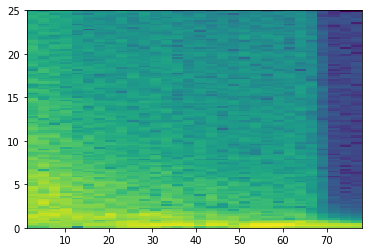

In [10]:
for i in cols_1:
    if __name__=='__main__':
        Process(target=loop_X,args=('Test',i)).start()
        Process(target=loop_Y,args=('Test',i)).start()
        data_X,file_list_X=loop_X('Test',i)
        data_Y,file_list_Y=loop_Y('Test',i)
        for i in range(n.int(data_X.shape[0])):
            if data_Y.loc[i][0]==0:
                save_loc_X=fig_path_1+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Test\\Damaged"
                save_loc_Y=fig_path_2+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Test\\Damaged"
                m.specgram(data_X.loc[i][0:4001],Fs=50)    
                m.savefig(save_loc_X+"\\"+"Spectrogram_X_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
                m.specgram(data_X.loc[i][4001:8002],Fs=50)    
                m.savefig(save_loc_Y+"\\"+"Spectrogram_Y_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
            else:
                save_loc_X=fig_path_1+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Test\\Undamaged"
                save_loc_Y=fig_path_2+"Joint_"+file_list_X[file_list_X.rfind('_')+1:-4]+"\\Test\\Undamaged"
                m.specgram(data_X.loc[i][0:4001],Fs=50)
                m.savefig(save_loc_X+"\\"+"Spectrogram_X_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
                m.specgram(data_X.loc[i][4001:8002],Fs=50)    
                m.savefig(save_loc_Y+"\\"+"Spectrogram_Y_"+file_list_X[file_list_X.rfind('_')+1:-4]+"_"+str(i)+".jpeg")
            